# 卷积自编码器
此notebook包括搭建卷积自编码器和通过卷积自编码器进行降噪处理

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#下载Mnist数据集
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


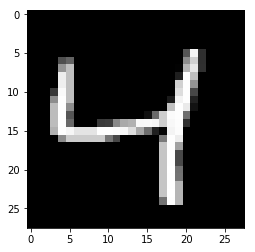

In [3]:
#预览图片
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

# 搭建自编码器
编码器为正常的卷积神经网络，解码器使用上采样的方法（最近邻和双线性插值）来进行图像尺寸的扩大。


In [7]:
inputs = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')
lr = tf.placeholder(tf.float32, name = 'learn_rate')

### Encoder
conv1 = tf.layers.conv2d(inputs, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# Now 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x8

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x8
conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(lr).minimize(cost)

In [8]:
#define get batch function
def get_batch(inputs, batch_size):
    num = len(inputs) // batch_size
    new_inputs = inputs[:num * batch_size]
    #get batch
    input_batch = np.array(np.split(new_inputs, num, 0))
    return input_batch

In [13]:
#超参数
epochs = 20
batch_size = 200
learn_rate = 0.001

In [14]:
#train
sess = tf.Session()
sess.run(tf.global_variables_initializer())
batch = get_batch(mnist.train.images, batch_size)
for e in range(epochs):
    for i in range(batch.shape[0]):
        batch_reshape = batch[i].reshape((-1, 28, 28 ,1))
        feed = {inputs: batch_reshape, targets: batch_reshape, lr: learn_rate}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
                  "Training loss: {:.4f}".format(batch_cost))


Epoch: 1/20... Training loss: 0.6851
Epoch: 1/20... Training loss: 0.6788
Epoch: 1/20... Training loss: 0.6705
Epoch: 1/20... Training loss: 0.6619
Epoch: 1/20... Training loss: 0.6499
Epoch: 1/20... Training loss: 0.6332
Epoch: 1/20... Training loss: 0.6287
Epoch: 1/20... Training loss: 0.5986
Epoch: 1/20... Training loss: 0.5744
Epoch: 1/20... Training loss: 0.5619
Epoch: 1/20... Training loss: 0.5452
Epoch: 1/20... Training loss: 0.5238
Epoch: 1/20... Training loss: 0.5279
Epoch: 1/20... Training loss: 0.5224
Epoch: 1/20... Training loss: 0.5251
Epoch: 1/20... Training loss: 0.5001
Epoch: 1/20... Training loss: 0.4952
Epoch: 1/20... Training loss: 0.4805
Epoch: 1/20... Training loss: 0.4983
Epoch: 1/20... Training loss: 0.4639
Epoch: 1/20... Training loss: 0.4593
Epoch: 1/20... Training loss: 0.4517
Epoch: 1/20... Training loss: 0.4508
Epoch: 1/20... Training loss: 0.4619
Epoch: 1/20... Training loss: 0.4380
Epoch: 1/20... Training loss: 0.4372
Epoch: 1/20... Training loss: 0.4369
E

Epoch: 1/20... Training loss: 0.1695
Epoch: 1/20... Training loss: 0.1707
Epoch: 1/20... Training loss: 0.1671
Epoch: 1/20... Training loss: 0.1673
Epoch: 1/20... Training loss: 0.1752
Epoch: 1/20... Training loss: 0.1680
Epoch: 1/20... Training loss: 0.1700
Epoch: 1/20... Training loss: 0.1686
Epoch: 1/20... Training loss: 0.1668
Epoch: 1/20... Training loss: 0.1699
Epoch: 1/20... Training loss: 0.1718
Epoch: 1/20... Training loss: 0.1696
Epoch: 1/20... Training loss: 0.1739
Epoch: 1/20... Training loss: 0.1633
Epoch: 1/20... Training loss: 0.1632
Epoch: 1/20... Training loss: 0.1686
Epoch: 1/20... Training loss: 0.1703
Epoch: 1/20... Training loss: 0.1607
Epoch: 1/20... Training loss: 0.1620
Epoch: 1/20... Training loss: 0.1668
Epoch: 1/20... Training loss: 0.1648
Epoch: 1/20... Training loss: 0.1688
Epoch: 1/20... Training loss: 0.1578
Epoch: 1/20... Training loss: 0.1721
Epoch: 1/20... Training loss: 0.1636
Epoch: 1/20... Training loss: 0.1702
Epoch: 1/20... Training loss: 0.1706
E

Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1442
Epoch: 2/20... Training loss: 0.1385
Epoch: 2/20... Training loss: 0.1430
Epoch: 2/20... Training loss: 0.1365
Epoch: 2/20... Training loss: 0.1453
Epoch: 2/20... Training loss: 0.1475
Epoch: 2/20... Training loss: 0.1464
Epoch: 2/20... Training loss: 0.1444
Epoch: 2/20... Training loss: 0.1419
Epoch: 2/20... Training loss: 0.1418
Epoch: 2/20... Training loss: 0.1413
Epoch: 2/20... Training loss: 0.1443
Epoch: 2/20... Training loss: 0.1471
Epoch: 2/20... Training loss: 0.1429
Epoch: 2/20... Training loss: 0.1451
Epoch: 2/20... Training loss: 0.1406
Epoch: 2/20... Training loss: 0.1419
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1439
Epoch: 2/20... Training loss: 0.1421
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1422
Epoch: 2/20... Training loss: 0.1343
Epoch: 2/20... Training loss: 0.1347
Epoch: 2/20... Training loss: 0.1450
E

Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1418
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1415
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1255
Epoch: 3/20... Training loss: 0.1240
Epoch: 3/20... Training loss: 0.1261
Epoch: 3/20... Training loss: 0.1323
E

Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1294
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1264
Epoch: 3/20... Training loss: 0.1417
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1271
Epoch: 3/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1300
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1336
Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1305
Epoch: 4/20... Training loss: 0.1271
E

Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1324
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1292
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1231
E

Epoch: 5/20... Training loss: 0.1205
Epoch: 5/20... Training loss: 0.1242
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1299
Epoch: 5/20... Training loss: 0.1279
Epoch: 5/20... Training loss: 0.1216
Epoch: 5/20... Training loss: 0.1231
Epoch: 5/20... Training loss: 0.1207
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1214
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1207
Epoch: 5/20... Training loss: 0.1272
Epoch: 5/20... Training loss: 0.1334
Epoch: 5/20... Training loss: 0.1214
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1213
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1221
Epoch: 5/20... Training loss: 0.1239
Epoch: 5/20... Training loss: 0.1238
Epoch: 5/20... Training loss: 0.1236
Epoch: 5/20... Training loss: 0.1215
Epoch: 5/20... Training loss: 0.1209
Epoch: 5/20... Training loss: 0.1185
Epoch: 5/20... Training loss: 0.1221
Epoch: 5/20... Training loss: 0.1257
E

Epoch: 6/20... Training loss: 0.1133
Epoch: 6/20... Training loss: 0.1164
Epoch: 6/20... Training loss: 0.1125
Epoch: 6/20... Training loss: 0.1155
Epoch: 6/20... Training loss: 0.1120
Epoch: 6/20... Training loss: 0.1146
Epoch: 6/20... Training loss: 0.1130
Epoch: 6/20... Training loss: 0.1198
Epoch: 6/20... Training loss: 0.1246
Epoch: 6/20... Training loss: 0.1253
Epoch: 6/20... Training loss: 0.1236
Epoch: 6/20... Training loss: 0.1182
Epoch: 6/20... Training loss: 0.1227
Epoch: 6/20... Training loss: 0.1214
Epoch: 6/20... Training loss: 0.1167
Epoch: 6/20... Training loss: 0.1226
Epoch: 6/20... Training loss: 0.1197
Epoch: 6/20... Training loss: 0.1186
Epoch: 6/20... Training loss: 0.1206
Epoch: 6/20... Training loss: 0.1214
Epoch: 6/20... Training loss: 0.1145
Epoch: 6/20... Training loss: 0.1203
Epoch: 6/20... Training loss: 0.1205
Epoch: 6/20... Training loss: 0.1203
Epoch: 6/20... Training loss: 0.1273
Epoch: 6/20... Training loss: 0.1153
Epoch: 6/20... Training loss: 0.1163
E

Epoch: 6/20... Training loss: 0.1130
Epoch: 6/20... Training loss: 0.1148
Epoch: 6/20... Training loss: 0.1177
Epoch: 6/20... Training loss: 0.1183
Epoch: 6/20... Training loss: 0.1160
Epoch: 6/20... Training loss: 0.1138
Epoch: 6/20... Training loss: 0.1207
Epoch: 6/20... Training loss: 0.1148
Epoch: 6/20... Training loss: 0.1128
Epoch: 6/20... Training loss: 0.1165
Epoch: 6/20... Training loss: 0.1201
Epoch: 6/20... Training loss: 0.1202
Epoch: 6/20... Training loss: 0.1151
Epoch: 6/20... Training loss: 0.1185
Epoch: 6/20... Training loss: 0.1171
Epoch: 6/20... Training loss: 0.1243
Epoch: 6/20... Training loss: 0.1185
Epoch: 6/20... Training loss: 0.1152
Epoch: 6/20... Training loss: 0.1291
Epoch: 6/20... Training loss: 0.1181
Epoch: 6/20... Training loss: 0.1249
Epoch: 6/20... Training loss: 0.1201
Epoch: 6/20... Training loss: 0.1160
Epoch: 6/20... Training loss: 0.1169
Epoch: 7/20... Training loss: 0.1157
Epoch: 7/20... Training loss: 0.1122
Epoch: 7/20... Training loss: 0.1161
E

Epoch: 7/20... Training loss: 0.1143
Epoch: 7/20... Training loss: 0.1189
Epoch: 7/20... Training loss: 0.1149
Epoch: 7/20... Training loss: 0.1133
Epoch: 7/20... Training loss: 0.1168
Epoch: 7/20... Training loss: 0.1144
Epoch: 7/20... Training loss: 0.1141
Epoch: 7/20... Training loss: 0.1170
Epoch: 7/20... Training loss: 0.1231
Epoch: 7/20... Training loss: 0.1167
Epoch: 7/20... Training loss: 0.1126
Epoch: 7/20... Training loss: 0.1116
Epoch: 7/20... Training loss: 0.1080
Epoch: 7/20... Training loss: 0.1145
Epoch: 7/20... Training loss: 0.1165
Epoch: 7/20... Training loss: 0.1172
Epoch: 7/20... Training loss: 0.1184
Epoch: 7/20... Training loss: 0.1090
Epoch: 7/20... Training loss: 0.1138
Epoch: 7/20... Training loss: 0.1160
Epoch: 7/20... Training loss: 0.1122
Epoch: 7/20... Training loss: 0.1135
Epoch: 7/20... Training loss: 0.1225
Epoch: 7/20... Training loss: 0.1181
Epoch: 7/20... Training loss: 0.1148
Epoch: 7/20... Training loss: 0.1176
Epoch: 7/20... Training loss: 0.1157
E

Epoch: 8/20... Training loss: 0.1039
Epoch: 8/20... Training loss: 0.1097
Epoch: 8/20... Training loss: 0.1176
Epoch: 8/20... Training loss: 0.1080
Epoch: 8/20... Training loss: 0.1046
Epoch: 8/20... Training loss: 0.1145
Epoch: 8/20... Training loss: 0.1150
Epoch: 8/20... Training loss: 0.1080
Epoch: 8/20... Training loss: 0.1096
Epoch: 8/20... Training loss: 0.1114
Epoch: 8/20... Training loss: 0.1092
Epoch: 8/20... Training loss: 0.1104
Epoch: 8/20... Training loss: 0.1125
Epoch: 8/20... Training loss: 0.1150
Epoch: 8/20... Training loss: 0.1092
Epoch: 8/20... Training loss: 0.1216
Epoch: 8/20... Training loss: 0.1206
Epoch: 8/20... Training loss: 0.1133
Epoch: 8/20... Training loss: 0.1147
Epoch: 8/20... Training loss: 0.1124
Epoch: 8/20... Training loss: 0.1092
Epoch: 8/20... Training loss: 0.1137
Epoch: 8/20... Training loss: 0.1079
Epoch: 8/20... Training loss: 0.1128
Epoch: 8/20... Training loss: 0.1183
Epoch: 8/20... Training loss: 0.1238
Epoch: 8/20... Training loss: 0.1132
E

Epoch: 9/20... Training loss: 0.1079
Epoch: 9/20... Training loss: 0.1136
Epoch: 9/20... Training loss: 0.1067
Epoch: 9/20... Training loss: 0.1143
Epoch: 9/20... Training loss: 0.1137
Epoch: 9/20... Training loss: 0.1164
Epoch: 9/20... Training loss: 0.1155
Epoch: 9/20... Training loss: 0.1145
Epoch: 9/20... Training loss: 0.1101
Epoch: 9/20... Training loss: 0.1089
Epoch: 9/20... Training loss: 0.1125
Epoch: 9/20... Training loss: 0.1137
Epoch: 9/20... Training loss: 0.1064
Epoch: 9/20... Training loss: 0.1093
Epoch: 9/20... Training loss: 0.1056
Epoch: 9/20... Training loss: 0.1084
Epoch: 9/20... Training loss: 0.1057
Epoch: 9/20... Training loss: 0.1066
Epoch: 9/20... Training loss: 0.1062
Epoch: 9/20... Training loss: 0.1118
Epoch: 9/20... Training loss: 0.1176
Epoch: 9/20... Training loss: 0.1176
Epoch: 9/20... Training loss: 0.1166
Epoch: 9/20... Training loss: 0.1119
Epoch: 9/20... Training loss: 0.1154
Epoch: 9/20... Training loss: 0.1140
Epoch: 9/20... Training loss: 0.1103
E

Epoch: 9/20... Training loss: 0.1133
Epoch: 9/20... Training loss: 0.1120
Epoch: 9/20... Training loss: 0.1116
Epoch: 9/20... Training loss: 0.1085
Epoch: 9/20... Training loss: 0.1132
Epoch: 9/20... Training loss: 0.1157
Epoch: 9/20... Training loss: 0.1159
Epoch: 9/20... Training loss: 0.1091
Epoch: 9/20... Training loss: 0.1120
Epoch: 9/20... Training loss: 0.1054
Epoch: 9/20... Training loss: 0.1123
Epoch: 9/20... Training loss: 0.1118
Epoch: 9/20... Training loss: 0.1077
Epoch: 9/20... Training loss: 0.1092
Epoch: 9/20... Training loss: 0.1118
Epoch: 9/20... Training loss: 0.1120
Epoch: 9/20... Training loss: 0.1102
Epoch: 9/20... Training loss: 0.1089
Epoch: 9/20... Training loss: 0.1152
Epoch: 9/20... Training loss: 0.1089
Epoch: 9/20... Training loss: 0.1071
Epoch: 9/20... Training loss: 0.1108
Epoch: 9/20... Training loss: 0.1141
Epoch: 9/20... Training loss: 0.1142
Epoch: 9/20... Training loss: 0.1101
Epoch: 9/20... Training loss: 0.1125
Epoch: 9/20... Training loss: 0.1116
E

Epoch: 10/20... Training loss: 0.1141
Epoch: 10/20... Training loss: 0.1138
Epoch: 10/20... Training loss: 0.1117
Epoch: 10/20... Training loss: 0.1110
Epoch: 10/20... Training loss: 0.1056
Epoch: 10/20... Training loss: 0.1106
Epoch: 10/20... Training loss: 0.1160
Epoch: 10/20... Training loss: 0.1142
Epoch: 10/20... Training loss: 0.1103
Epoch: 10/20... Training loss: 0.1110
Epoch: 10/20... Training loss: 0.1120
Epoch: 10/20... Training loss: 0.1065
Epoch: 10/20... Training loss: 0.1155
Epoch: 10/20... Training loss: 0.1090
Epoch: 10/20... Training loss: 0.1047
Epoch: 10/20... Training loss: 0.1088
Epoch: 10/20... Training loss: 0.1010
Epoch: 10/20... Training loss: 0.1091
Epoch: 10/20... Training loss: 0.1139
Epoch: 10/20... Training loss: 0.1096
Epoch: 10/20... Training loss: 0.1077
Epoch: 10/20... Training loss: 0.1118
Epoch: 10/20... Training loss: 0.1090
Epoch: 10/20... Training loss: 0.1090
Epoch: 10/20... Training loss: 0.1124
Epoch: 10/20... Training loss: 0.1164
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1045
Epoch: 11/20... Training loss: 0.1053
Epoch: 11/20... Training loss: 0.1136
Epoch: 11/20... Training loss: 0.1100
Epoch: 11/20... Training loss: 0.1079
Epoch: 11/20... Training loss: 0.1056
Epoch: 11/20... Training loss: 0.1038
Epoch: 11/20... Training loss: 0.1098
Epoch: 11/20... Training loss: 0.1078
Epoch: 11/20... Training loss: 0.1118
Epoch: 11/20... Training loss: 0.1091
Epoch: 11/20... Training loss: 0.1073
Epoch: 11/20... Training loss: 0.1072
Epoch: 11/20... Training loss: 0.1201
Epoch: 11/20... Training loss: 0.1116
Epoch: 11/20... Training loss: 0.1080
Epoch: 11/20... Training loss: 0.1092
Epoch: 11/20... Training loss: 0.1094
Epoch: 11/20... Training loss: 0.1082
Epoch: 11/20... Training loss: 0.1034
Epoch: 11/20... Training loss: 0.1078
Epoch: 11/20... Training loss: 0.1145
Epoch: 11/20... Training loss: 0.1131
Epoch: 11/20... Training loss: 0.1000
Epoch: 11/20... Training loss: 0.1050
Epoch: 11/20... Training loss: 0.1120
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1102
Epoch: 12/20... Training loss: 0.1066
Epoch: 12/20... Training loss: 0.1119
Epoch: 12/20... Training loss: 0.1027
Epoch: 12/20... Training loss: 0.1058
Epoch: 12/20... Training loss: 0.1169
Epoch: 12/20... Training loss: 0.1091
Epoch: 12/20... Training loss: 0.1046
Epoch: 12/20... Training loss: 0.1096
Epoch: 12/20... Training loss: 0.1069
Epoch: 12/20... Training loss: 0.1125
Epoch: 12/20... Training loss: 0.1101
Epoch: 12/20... Training loss: 0.1115
Epoch: 12/20... Training loss: 0.1102
Epoch: 12/20... Training loss: 0.1059
Epoch: 12/20... Training loss: 0.1081
Epoch: 12/20... Training loss: 0.1065
Epoch: 12/20... Training loss: 0.1076
Epoch: 12/20... Training loss: 0.1026
Epoch: 12/20... Training loss: 0.1051
Epoch: 12/20... Training loss: 0.1042
Epoch: 12/20... Training loss: 0.1082
Epoch: 12/20... Training loss: 0.1077
Epoch: 12/20... Training loss: 0.1126
Epoch: 12/20... Training loss: 0.1033
Epoch: 12/20... Training loss: 0.1085
Epoch: 12/20

Epoch: 12/20... Training loss: 0.1118
Epoch: 12/20... Training loss: 0.1079
Epoch: 12/20... Training loss: 0.1116
Epoch: 12/20... Training loss: 0.1091
Epoch: 12/20... Training loss: 0.1101
Epoch: 12/20... Training loss: 0.1091
Epoch: 12/20... Training loss: 0.1059
Epoch: 12/20... Training loss: 0.1061
Epoch: 12/20... Training loss: 0.1129
Epoch: 12/20... Training loss: 0.1120
Epoch: 12/20... Training loss: 0.1046
Epoch: 12/20... Training loss: 0.1050
Epoch: 12/20... Training loss: 0.1080
Epoch: 12/20... Training loss: 0.1072
Epoch: 12/20... Training loss: 0.1112
Epoch: 12/20... Training loss: 0.1063
Epoch: 12/20... Training loss: 0.1160
Epoch: 12/20... Training loss: 0.1068
Epoch: 12/20... Training loss: 0.1143
Epoch: 12/20... Training loss: 0.1113
Epoch: 12/20... Training loss: 0.1105
Epoch: 12/20... Training loss: 0.1050
Epoch: 12/20... Training loss: 0.1094
Epoch: 12/20... Training loss: 0.1098
Epoch: 12/20... Training loss: 0.1059
Epoch: 12/20... Training loss: 0.1023
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1165
Epoch: 13/20... Training loss: 0.1061
Epoch: 13/20... Training loss: 0.0999
Epoch: 13/20... Training loss: 0.1065
Epoch: 13/20... Training loss: 0.1018
Epoch: 13/20... Training loss: 0.1077
Epoch: 13/20... Training loss: 0.1071
Epoch: 13/20... Training loss: 0.1087
Epoch: 13/20... Training loss: 0.1084
Epoch: 13/20... Training loss: 0.1073
Epoch: 13/20... Training loss: 0.1067
Epoch: 13/20... Training loss: 0.1044
Epoch: 13/20... Training loss: 0.1077
Epoch: 13/20... Training loss: 0.1108
Epoch: 13/20... Training loss: 0.1053
Epoch: 13/20... Training loss: 0.1081
Epoch: 13/20... Training loss: 0.1058
Epoch: 13/20... Training loss: 0.1033
Epoch: 13/20... Training loss: 0.1112
Epoch: 13/20... Training loss: 0.1063
Epoch: 13/20... Training loss: 0.1036
Epoch: 13/20... Training loss: 0.1082
Epoch: 13/20... Training loss: 0.1060
Epoch: 13/20... Training loss: 0.1003
Epoch: 13/20... Training loss: 0.1002
Epoch: 13/20... Training loss: 0.1078
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1052
Epoch: 14/20... Training loss: 0.1099
Epoch: 14/20... Training loss: 0.1098
Epoch: 14/20... Training loss: 0.1099
Epoch: 14/20... Training loss: 0.1058
Epoch: 14/20... Training loss: 0.1083
Epoch: 14/20... Training loss: 0.1069
Epoch: 14/20... Training loss: 0.1046
Epoch: 14/20... Training loss: 0.1099
Epoch: 14/20... Training loss: 0.1049
Epoch: 14/20... Training loss: 0.1048
Epoch: 14/20... Training loss: 0.1072
Epoch: 14/20... Training loss: 0.1080
Epoch: 14/20... Training loss: 0.1027
Epoch: 14/20... Training loss: 0.1075
Epoch: 14/20... Training loss: 0.1065
Epoch: 14/20... Training loss: 0.1073
Epoch: 14/20... Training loss: 0.1139
Epoch: 14/20... Training loss: 0.1041
Epoch: 14/20... Training loss: 0.1037
Epoch: 14/20... Training loss: 0.1014
Epoch: 14/20... Training loss: 0.1044
Epoch: 14/20... Training loss: 0.1078
Epoch: 14/20... Training loss: 0.1068
Epoch: 14/20... Training loss: 0.1071
Epoch: 14/20... Training loss: 0.1119
Epoch: 14/20

Epoch: 14/20... Training loss: 0.1025
Epoch: 14/20... Training loss: 0.1059
Epoch: 14/20... Training loss: 0.1060
Epoch: 14/20... Training loss: 0.1043
Epoch: 14/20... Training loss: 0.1030
Epoch: 14/20... Training loss: 0.1087
Epoch: 14/20... Training loss: 0.1031
Epoch: 14/20... Training loss: 0.1016
Epoch: 14/20... Training loss: 0.1051
Epoch: 14/20... Training loss: 0.1079
Epoch: 14/20... Training loss: 0.1089
Epoch: 14/20... Training loss: 0.1057
Epoch: 14/20... Training loss: 0.1064
Epoch: 14/20... Training loss: 0.1064
Epoch: 14/20... Training loss: 0.1104
Epoch: 14/20... Training loss: 0.1069
Epoch: 14/20... Training loss: 0.1032
Epoch: 14/20... Training loss: 0.1144
Epoch: 14/20... Training loss: 0.1071
Epoch: 14/20... Training loss: 0.1107
Epoch: 14/20... Training loss: 0.1076
Epoch: 14/20... Training loss: 0.1032
Epoch: 14/20... Training loss: 0.1063
Epoch: 15/20... Training loss: 0.1026
Epoch: 15/20... Training loss: 0.1021
Epoch: 15/20... Training loss: 0.1049
Epoch: 15/20

Epoch: 15/20... Training loss: 0.1096
Epoch: 15/20... Training loss: 0.1039
Epoch: 15/20... Training loss: 0.0995
Epoch: 15/20... Training loss: 0.1042
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.1041
Epoch: 15/20... Training loss: 0.1082
Epoch: 15/20... Training loss: 0.1045
Epoch: 15/20... Training loss: 0.1033
Epoch: 15/20... Training loss: 0.1056
Epoch: 15/20... Training loss: 0.1042
Epoch: 15/20... Training loss: 0.1042
Epoch: 15/20... Training loss: 0.1071
Epoch: 15/20... Training loss: 0.1105
Epoch: 15/20... Training loss: 0.1059
Epoch: 15/20... Training loss: 0.1022
Epoch: 15/20... Training loss: 0.1018
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.1038
Epoch: 15/20... Training loss: 0.1054
Epoch: 15/20... Training loss: 0.1053
Epoch: 15/20... Training loss: 0.1081
Epoch: 15/20... Training loss: 0.0999
Epoch: 15/20... Training loss: 0.1029
Epoch: 15/20... Training loss: 0.1066
Epoch: 15/20... Training loss: 0.1022
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1023
Epoch: 16/20... Training loss: 0.1145
Epoch: 16/20... Training loss: 0.1068
Epoch: 16/20... Training loss: 0.1030
Epoch: 16/20... Training loss: 0.1038
Epoch: 16/20... Training loss: 0.1046
Epoch: 16/20... Training loss: 0.1032
Epoch: 16/20... Training loss: 0.0988
Epoch: 16/20... Training loss: 0.1031
Epoch: 16/20... Training loss: 0.1094
Epoch: 16/20... Training loss: 0.1087
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0999
Epoch: 16/20... Training loss: 0.1067
Epoch: 16/20... Training loss: 0.0994
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.1049
Epoch: 16/20... Training loss: 0.1047
Epoch: 16/20... Training loss: 0.0985
Epoch: 16/20... Training loss: 0.1010
Epoch: 16/20... Training loss: 0.1030
Epoch: 16/20... Training loss: 0.1006
Epoch: 16/20... Training loss: 0.1022
Epoch: 16/20... Training loss: 0.1041
Epoch: 16/20... Training loss: 0.1054
Epoch: 16/20... Training loss: 0.1006
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1070
Epoch: 17/20... Training loss: 0.1063
Epoch: 17/20... Training loss: 0.1022
Epoch: 17/20... Training loss: 0.1034
Epoch: 17/20... Training loss: 0.1022
Epoch: 17/20... Training loss: 0.1038
Epoch: 17/20... Training loss: 0.0983
Epoch: 17/20... Training loss: 0.1007
Epoch: 17/20... Training loss: 0.1010
Epoch: 17/20... Training loss: 0.1046
Epoch: 17/20... Training loss: 0.1038
Epoch: 17/20... Training loss: 0.1074
Epoch: 17/20... Training loss: 0.0998
Epoch: 17/20... Training loss: 0.1041
Epoch: 17/20... Training loss: 0.1036
Epoch: 17/20... Training loss: 0.1010
Epoch: 17/20... Training loss: 0.1036
Epoch: 17/20... Training loss: 0.0991
Epoch: 17/20... Training loss: 0.1042
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.1056
Epoch: 17/20... Training loss: 0.1049
Epoch: 17/20... Training loss: 0.1063
Epoch: 17/20... Training loss: 0.1074
Epoch: 17/20... Training loss: 0.1047
Epoch: 17/20... Training loss: 0.1009
Epoch: 17/20

Epoch: 17/20... Training loss: 0.1038
Epoch: 17/20... Training loss: 0.1026
Epoch: 17/20... Training loss: 0.1069
Epoch: 17/20... Training loss: 0.1024
Epoch: 17/20... Training loss: 0.1110
Epoch: 17/20... Training loss: 0.1032
Epoch: 17/20... Training loss: 0.1098
Epoch: 17/20... Training loss: 0.1074
Epoch: 17/20... Training loss: 0.1064
Epoch: 17/20... Training loss: 0.1014
Epoch: 17/20... Training loss: 0.1048
Epoch: 17/20... Training loss: 0.1058
Epoch: 17/20... Training loss: 0.1022
Epoch: 17/20... Training loss: 0.0983
Epoch: 17/20... Training loss: 0.1010
Epoch: 17/20... Training loss: 0.1032
Epoch: 17/20... Training loss: 0.1041
Epoch: 17/20... Training loss: 0.1058
Epoch: 17/20... Training loss: 0.1044
Epoch: 17/20... Training loss: 0.1051
Epoch: 17/20... Training loss: 0.0991
Epoch: 17/20... Training loss: 0.1023
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.1054
Epoch: 17/20... Training loss: 0.1037
Epoch: 17/20... Training loss: 0.1034
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1042
Epoch: 18/20... Training loss: 0.1070
Epoch: 18/20... Training loss: 0.1015
Epoch: 18/20... Training loss: 0.1046
Epoch: 18/20... Training loss: 0.1019
Epoch: 18/20... Training loss: 0.1003
Epoch: 18/20... Training loss: 0.1070
Epoch: 18/20... Training loss: 0.1024
Epoch: 18/20... Training loss: 0.1001
Epoch: 18/20... Training loss: 0.1043
Epoch: 18/20... Training loss: 0.1028
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.1040
Epoch: 18/20... Training loss: 0.1025
Epoch: 18/20... Training loss: 0.1014
Epoch: 18/20... Training loss: 0.1057
Epoch: 18/20... Training loss: 0.1014
Epoch: 18/20... Training loss: 0.1055
Epoch: 18/20... Training loss: 0.1001
Epoch: 18/20... Training loss: 0.1053
Epoch: 18/20... Training loss: 0.1037
Epoch: 18/20... Training loss: 0.1056
Epoch: 18/20... Training loss: 0.1036
Epoch: 18/20... Training loss: 0.1055
Epoch: 18/20... Training loss: 0.1061
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1052
Epoch: 19/20... Training loss: 0.0991
Epoch: 19/20... Training loss: 0.1044
Epoch: 19/20... Training loss: 0.1034
Epoch: 19/20... Training loss: 0.1034
Epoch: 19/20... Training loss: 0.1106
Epoch: 19/20... Training loss: 0.1009
Epoch: 19/20... Training loss: 0.1003
Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20... Training loss: 0.1017
Epoch: 19/20... Training loss: 0.1046
Epoch: 19/20... Training loss: 0.1037
Epoch: 19/20... Training loss: 0.1040
Epoch: 19/20... Training loss: 0.1081
Epoch: 19/20... Training loss: 0.1068
Epoch: 19/20... Training loss: 0.1037
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.1019
Epoch: 19/20... Training loss: 0.1085
Epoch: 19/20... Training loss: 0.0996
Epoch: 19/20... Training loss: 0.0993
Epoch: 19/20... Training loss: 0.1085
Epoch: 19/20... Training loss: 0.0980
Epoch: 19/20... Training loss: 0.0997
Epoch: 19/20

Epoch: 19/20... Training loss: 0.1038
Epoch: 19/20... Training loss: 0.1038
Epoch: 19/20... Training loss: 0.1073
Epoch: 19/20... Training loss: 0.1042
Epoch: 19/20... Training loss: 0.0999
Epoch: 19/20... Training loss: 0.1114
Epoch: 19/20... Training loss: 0.1042
Epoch: 19/20... Training loss: 0.1075
Epoch: 19/20... Training loss: 0.1047
Epoch: 19/20... Training loss: 0.1005
Epoch: 19/20... Training loss: 0.1030
Epoch: 20/20... Training loss: 0.0995
Epoch: 20/20... Training loss: 0.0995
Epoch: 20/20... Training loss: 0.1021
Epoch: 20/20... Training loss: 0.1032
Epoch: 20/20... Training loss: 0.1013
Epoch: 20/20... Training loss: 0.1038
Epoch: 20/20... Training loss: 0.1011
Epoch: 20/20... Training loss: 0.1044
Epoch: 20/20... Training loss: 0.1010
Epoch: 20/20... Training loss: 0.0997
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.1052
Epoch: 20/20... Training loss: 0.1024
Epoch: 20/20... Training loss: 0.1044
Epoch: 20/20... Training loss: 0.1016
Epoch: 20/20

Epoch: 20/20... Training loss: 0.1045
Epoch: 20/20... Training loss: 0.1075
Epoch: 20/20... Training loss: 0.1031
Epoch: 20/20... Training loss: 0.0995
Epoch: 20/20... Training loss: 0.0990
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.1012
Epoch: 20/20... Training loss: 0.1026
Epoch: 20/20... Training loss: 0.1026
Epoch: 20/20... Training loss: 0.1051
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.1001
Epoch: 20/20... Training loss: 0.1039
Epoch: 20/20... Training loss: 0.0994
Epoch: 20/20... Training loss: 0.1013
Epoch: 20/20... Training loss: 0.1090
Epoch: 20/20... Training loss: 0.1051
Epoch: 20/20... Training loss: 0.1016
Epoch: 20/20... Training loss: 0.1047
Epoch: 20/20... Training loss: 0.1037
Epoch: 20/20... Training loss: 0.1002
Epoch: 20/20... Training loss: 0.1030
Epoch: 20/20... Training loss: 0.1057
Epoch: 20/20... Training loss: 0.1066
Epoch: 20/20... Training loss: 0.1063
Epoch: 20/20... Training loss: 0.1026
Epoch: 20/20

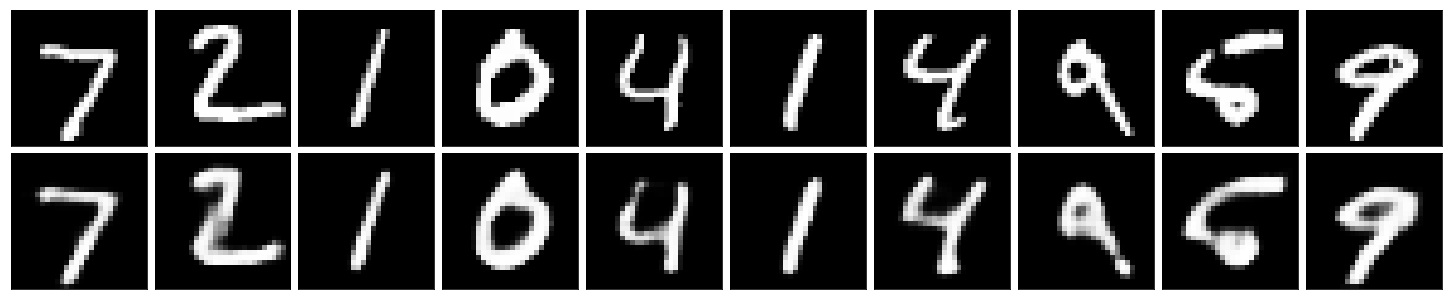

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

In [17]:
sess.close()

# 加入噪声